In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

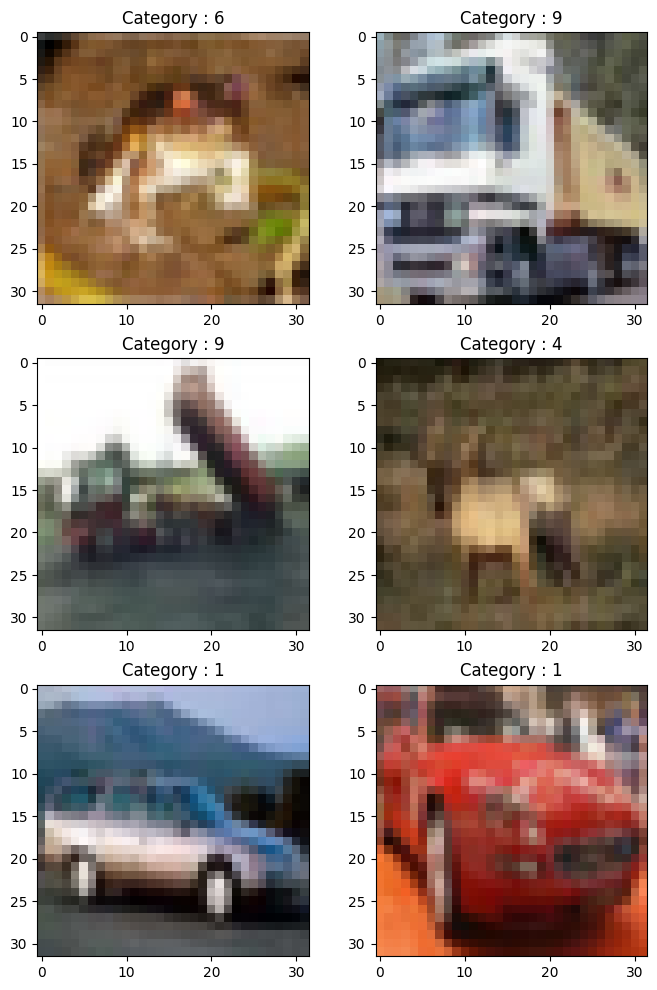

In [4]:
plt.figure(figsize=(8,12))

for x in range(0, 6):
  plt.subplot(3,2,x+1)
  plt.title(f"Category : {y_train[x][0]}")
  plt.imshow(x_train[x])



In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
report = model.fit(x_train, y_train,
          epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2807 - loss: 1.9759 - val_accuracy: 0.3373 - val_loss: 1.8141
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3972 - loss: 1.6863 - val_accuracy: 0.3913 - val_loss: 1.6873
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4338 - loss: 1.5944 - val_accuracy: 0.4086 - val_loss: 1.6591
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.4528 - loss: 1.5357 - val_accuracy: 0.3606 - val_loss: 1.8647
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4741 - loss: 1.4773 - val_accuracy: 0.4647 - val_loss: 1.4846
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.4900 - loss: 1.4330 - val_accuracy: 0.4701 - val_loss: 1.4775
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.5005 - loss: 1.4018 - val_accuracy: 0.4448 - val_loss: 1.5326
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5123 -

In [11]:
def softmax_to_category(x):
  return np.argmax(x)

In [16]:
result = model.evaluate(x_test.reshape(x_test.shape[0],32,32,3), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5040 - loss: 1.3980


<ipython-input-23-a93ad31cb848>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


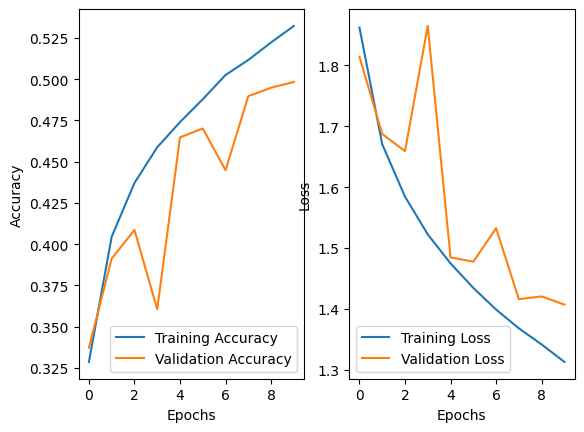

In [23]:

plt.title("Model Performance")
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(report.history['accuracy'], label='Training Accuracy')
plt.plot(report.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.plot(report.history['loss'], label='Training Loss')
plt.plot(report.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


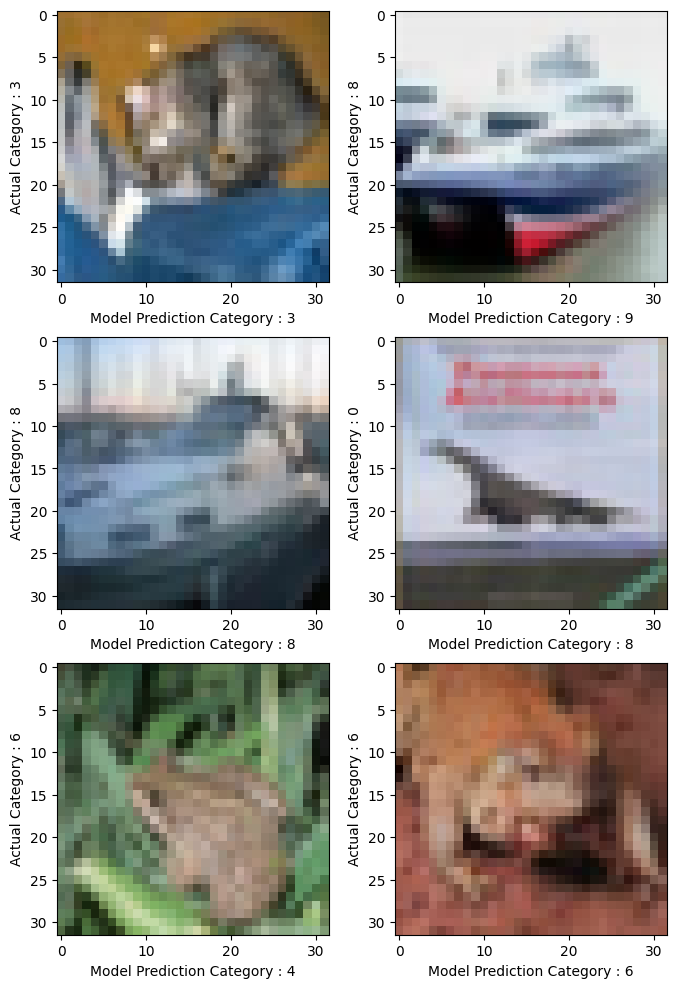

In [30]:
plt.figure(figsize=(8,12))

for x in range(0, 6):
  plt.subplot(3,2,x+1)
  plt.xlabel(f"Model Prediction Category : {softmax_to_category(model.predict(x_test[x].reshape(1,32,32,3)))}")
  plt.ylabel(f"Actual Category : {y_test[x][0]}")
  plt.imshow(x_test[x])